# Experiment 1: Working with Python packages - Numpy, Scipy, Scikit-Learn, Matplotlib

In [71]:
loan_train_file = "/content/loan_approval_dataset.csv"
loan_test_file = "/content/loan_approval_dataset.csv"

email_file = "C:\machine learning\ass1\email.csv"

iris_file = "/content/iris.csv"

diabetes_file = "/content/diabetes_prediction_dataset.csv"

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3380095817.py:4: SyntaxWarning: invalid escape sequence '\m'
  email_file = "C:\machine learning\ass1\email.csv"


## Loan Prediction:

In [72]:
import pandas as pd

df = pd.read_csv(loan_train_file)
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [73]:
# Removing rows with NaN loan amount.
df = df[~df[' loan_amount'].isna()]

In [74]:
df = df.drop(columns=['loan_id', ' loan_status'])

target = df[' loan_amount']
features = df.drop(columns=[' loan_amount'])

In [75]:
print(features.info())
print('\n')
print("Number of NaN values")
print(features.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_term                 4269 non-null   int64 
 5    cibil_score               4269 non-null   int64 
 6    residential_assets_value  4269 non-null   int64 
 7    commercial_assets_value   4269 non-null   int64 
 8    luxury_assets_value       4269 non-null   int64 
 9    bank_asset_value          4269 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 333.6+ KB
None


Number of NaN values
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_term                   0
cib

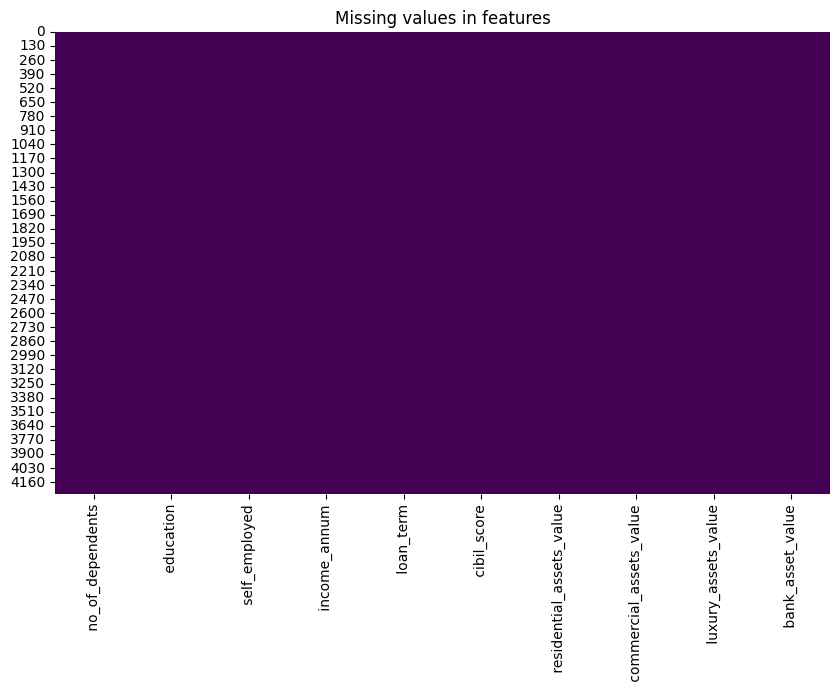

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in features")
plt.show()

In [77]:
features[' no_of_dependents'] = features[' no_of_dependents'].fillna(features[' no_of_dependents'].mode()[0])
features[' self_employed'] = features[' self_employed'].fillna(features[' self_employed'].mode()[0])
features[' loan_term'] = features[' loan_term'].fillna(features[' loan_term'].mode()[0])

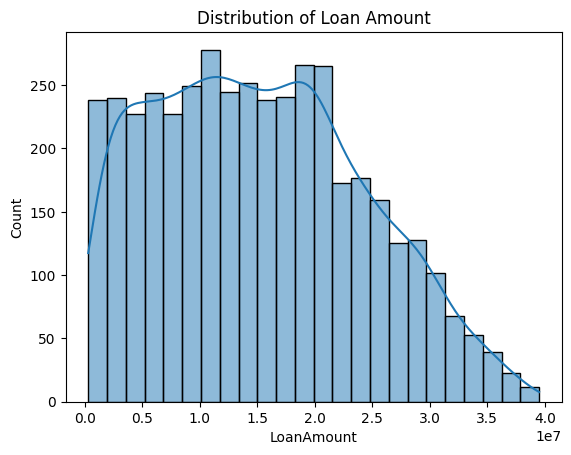

In [78]:
sns.histplot(target, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("LoanAmount")
plt.show()

##Email Spam


In [79]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the uploaded filename (it's a dictionary key)
filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(filename)

# (Optional) Clean column names to avoid KeyError issues
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Print columns to confirm
print(df.columns)


Saving email.csv to email (1).csv
Index(['category', 'message'], dtype='object')


In [80]:
df.head()
print(df['message'].head())
print(df['category'].value_counts())


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object
category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


In [81]:
# STEP 3: Create binary prediction column: spam=1, ham=0
df['prediction'] = (df['category'] == 'spam').astype(int)

# STEP 4: Vectorize the messages
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])

# STEP 5: Turn into DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# STEP 6: Join with original df and reset index
df = pd.concat([df.reset_index(drop=True), word_counts.reset_index(drop=True)], axis=1)

# ✅ Fix 1: Remove duplicate columns from df
df = df.loc[:, ~df.columns.duplicated()]

# STEP 7: Total word frequency
total_counts = word_counts.sum()

# STEP 8: Filter frequent words
min_occurrence = 500
valid_words = total_counts[total_counts >= min_occurrence].index

# ✅ Fix 2: Ensure valid_words has unique values
valid_words = pd.Index(valid_words).drop_duplicates()

# ✅ Fix 3: Ensure valid_words are in df.columns (some may be missing due to previous issues)
valid_words = [word for word in valid_words if word in df.columns]

# STEP 9: Calculate word usage in spam and non-spam
spam_word_counts = df[df['prediction'] == 1][valid_words].sum()
non_spam_word_counts = df[df['prediction'] == 0][valid_words].sum()

# STEP 10: Create comparison DataFrame
word_diff = pd.DataFrame({
    'spam': spam_word_counts,
    'non_spam': non_spam_word_counts,
})

# STEP 11: Sort and display
word_diff = word_diff.sort_values(by='spam', ascending=False)
print(word_diff.head(10))

      spam  non_spam
to     688      1562
call   352       238
you    297      1948
your   264       417
for    204       507
the    203      1133
is     157       739
on     145       393
have   132       443
and    122       858


In [82]:
word_diff['spam_ratio'] = word_diff['spam'] / (word_diff['spam'] + word_diff['non_spam'] + 1e-5)  # smoothing
word_diff['abs_diff'] = abs(word_diff['spam'] - word_diff['non_spam'])

top_spam_ratio_words = word_diff.sort_values('spam_ratio', ascending=False).head(20)

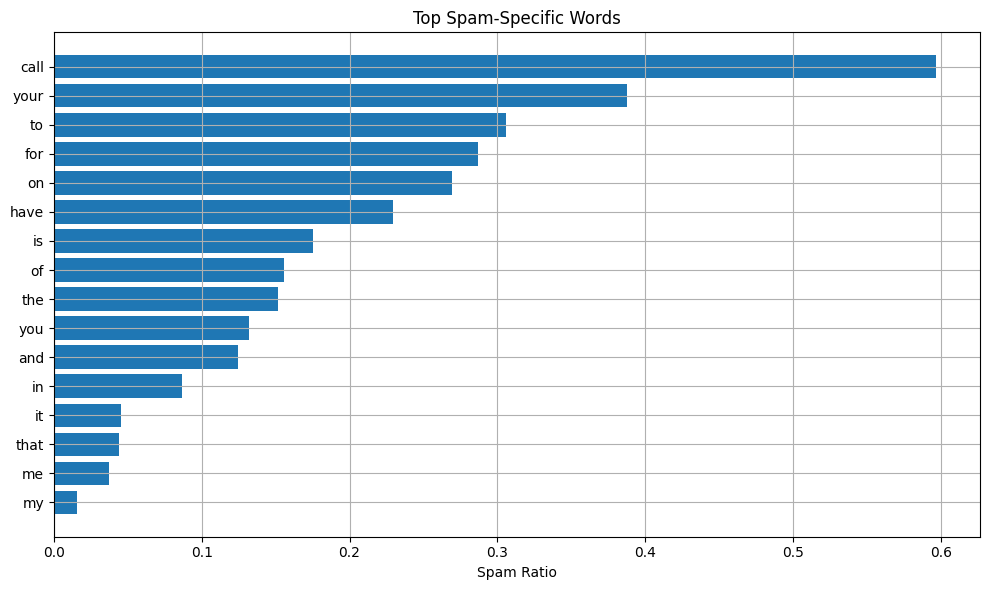

In [83]:
import matplotlib.pyplot as plt

top_words = top_filtered if 'top_filtered' in locals() else top_spam_ratio_words

plt.figure(figsize=(10, 6))
plt.barh(top_words.index[::-1], top_words['spam_ratio'][::-1])
plt.xlabel('Spam Ratio')
plt.title('Top Spam-Specific Words')
plt.grid(True)
plt.tight_layout()
plt.show()


## Predicting Diabetes

In [84]:
import pandas as pd

df = pd.read_csv(diabetes_file)

In [85]:
df.head()
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [86]:
df["diabetes"].value_counts()


,count
diabetes,
0,91500
1,8500


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
correlation = df.corr(numeric_only=True)

# Display correlation with 'Outcome' column
outcome_corr = correlation['diabetes'].sort_values(ascending=False)
print(outcome_corr)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64


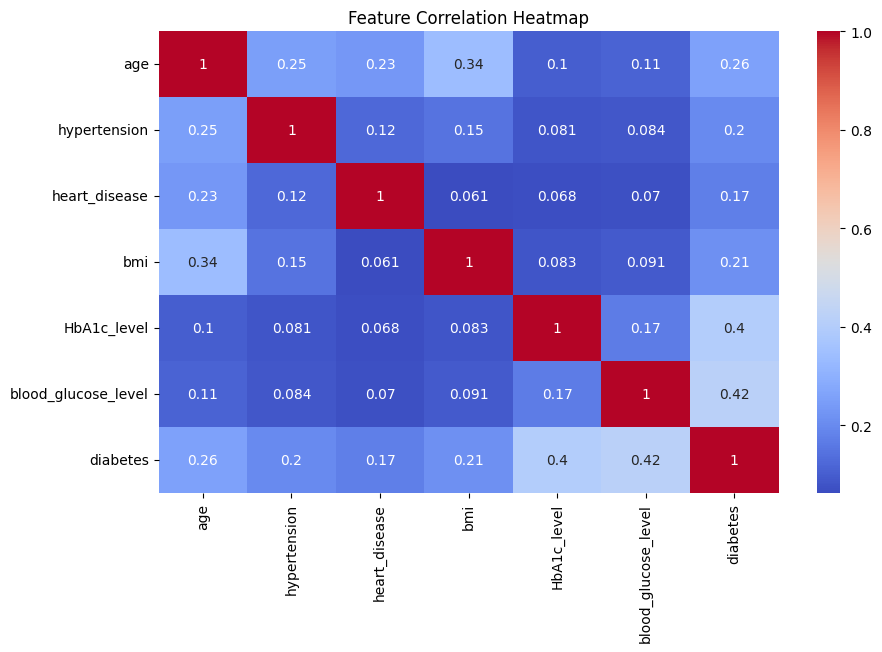

In [88]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# 2. One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 4. Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [90]:
X_scaled_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,-0.841046,-0.013418,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,-0.841046,-0.013418,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,1.188995,-0.013418,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,-0.841046,-0.013418,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,1.188995,-0.013418,3.125524,-0.20423,-0.321198,-0.735332,-0.262512


## Iris Dataset

In [91]:
import pandas as pd

df = pd.read_csv(iris_file)

In [92]:
df.head()
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [93]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [94]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target column
df['species_encoded'] = LabelEncoder().fit_transform(df['species'])

# Correlation matrix
correlation = df.corr(numeric_only=True)

# Display correlation with species
print(correlation['species_encoded'].sort_values(ascending=False))

species_encoded    1.000000
petal_width        0.956464
petal_length       0.949043
sepal_length       0.782561
sepal_width       -0.419446
Name: species_encoded, dtype: float64


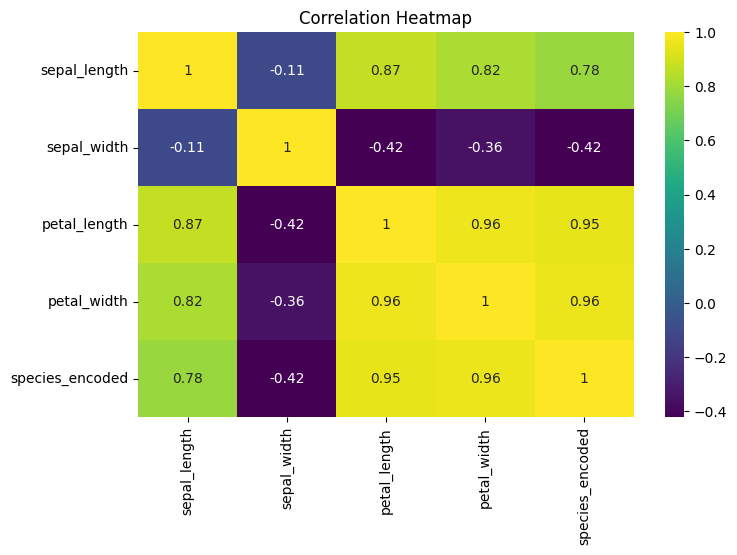

In [95]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()